In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss, mean_squared_error
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

In [2]:
from GradientBoosting_article import GBRegression, GBClassification, GradientBoosting

## Regression

In [3]:
X, y = datasets.make_regression(n_samples=20000, n_features=20, n_informative=10, noise=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [4]:
M = 1500
learning_rate = 1.0

### early stopping

In [6]:
gb_early_square = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="square", tol=0.02)
gb_early_square.fit(X_train, y_train)

0.01
0.005
early stopping in round 350, best round is 330, M = 330
loss:  105.76810413864833


In [7]:
gb_early_huber = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="huber", alpha=0.2, tol=0.02)
gb_early_huber.fit(X_train, y_train)

0.01
0.01
0.01
0.005
early stopping in round 900, best round is 880, M = 880
loss:  103.11501861500744


----

In [6]:
gbr = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr.fit(X_train, y_train)

gbr_huber = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="huber", alpha=0.2)
gbr_huber.fit(X_train, y_train)

In [7]:
gbr_err_train = np.zeros((M+1,))
for i, y_pred in enumerate(gbr.stage_predict(X_train)):
    gbr_err_train[i] = np.sqrt(mean_squared_error(y_pred, y_train))
    
gbr_err_test = np.zeros((M+1,))
for i, y_pred in enumerate(gbr.stage_predict(X_test)):
    gbr_err_test[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_huber_err_train = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_huber.stage_predict(X_train)):
    gbr_huber_err_train[i] = np.sqrt(mean_squared_error(y_pred, y_train))
    
gbr_huber_err_test = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_huber.stage_predict(X_test)):
    gbr_huber_err_test[i] = np.sqrt(mean_squared_error(y_pred, y_test))

In [8]:
gbr_early_stopping = GBRegression(M=330, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr_early_stopping.fit(X_train, y_train)

early_stopping_square = np.sqrt(mean_squared_error(gbr_early_stopping.predict(X_test), y_test))

In [9]:
gbr_huber_early_stopping = GBRegression(M=880, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                                         learning_rate=learning_rate, loss="huber", alpha=0.2)
gbr_huber_early_stopping.fit(X_train, y_train)

early_stopping_huber = np.sqrt(mean_squared_error(gbr_huber_early_stopping.predict(X_test), y_test))

Text(0,0.5,'Error Rate')

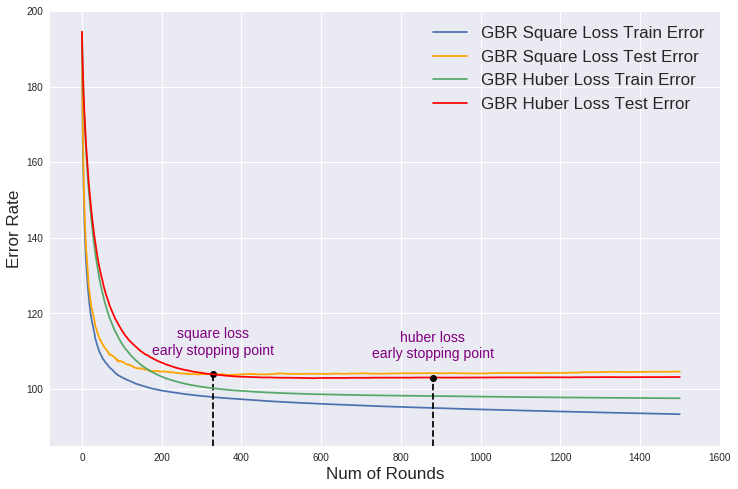

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M+1), gbr_err_train ,label="GBR Square Loss Train Error")
ax.plot(np.arange(M+1), gbr_err_test ,label="GBR Square Loss Test Error",color="orange")

ax.plot([330,330],[85,early_stopping_square],"k--")
plt.plot(330,early_stopping_square, "ko")
plt.text(330,early_stopping_square*1.05,"square loss\nearly stopping point", ha="center", fontsize=14, color="purple")

ax.plot(np.arange(M+1), gbr_huber_err_train ,label="GBR Huber Loss Train Error")
ax.plot(np.arange(M+1), gbr_huber_err_test ,label="GBR Huber Loss Test Error", color="red")

ax.plot([880,880],[85,early_stopping_huber],"k--")
plt.plot(880,early_stopping_huber, "ko")
plt.text(880,early_stopping_huber*1.05,"huber loss\nearly stopping point", ha="center", fontsize=14, color="purple")

ax.legend(loc="best", fontsize=17)
ax.set_ylim([85,200])
ax.set_xlim([-80,1600])
ax.set_xlabel("Num of Rounds", fontsize=17)
ax.set_ylabel("Error Rate", fontsize=17)

### smaller learning rate

In [54]:
M = 1500
learning_rate = 0.2

In [55]:
gbr = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr.fit(X_train, y_train)

gbr_huber = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="huber", alpha=0.2)
gbr_huber.fit(X_train, y_train)

In [56]:
gbr_err_train = np.zeros((M+1,))
for i, y_pred in enumerate(gbr.stage_predict(X_train)):
    gbr_err_train[i] = np.sqrt(mean_squared_error(y_pred, y_train))
    
gbr_err_test = np.zeros((M+1,))
for i, y_pred in enumerate(gbr.stage_predict(X_test)):
    gbr_err_test[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_huber_err_train = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_huber.stage_predict(X_train)):
    gbr_huber_err_train[i] = np.sqrt(mean_squared_error(y_pred, y_train))
    
gbr_huber_err_test = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_huber.stage_predict(X_test)):
    gbr_huber_err_test[i] = np.sqrt(mean_squared_error(y_pred, y_test))

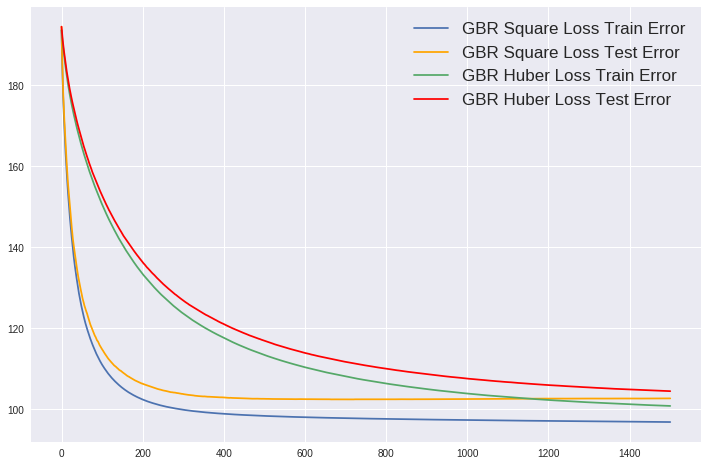

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M+1), gbr_err_train ,label="GBR Square Loss Train Error")
ax.plot(np.arange(M+1), gbr_err_test ,label="GBR Square Loss Test Error",color="orange")
ax.plot(np.arange(M+1), gbr_huber_err_train ,label="GBR Huber Loss Train Error")
ax.plot(np.arange(M+1), gbr_huber_err_test ,label="GBR Huber Loss Test Error", color="red")

ax.legend(loc="best", fontsize=17)
# ax.set_ylim([0,90])
# ax.set_xlim([-80,1600])

## multiple tree depth

In [17]:
M = 1500
learning_rate = 1.0

In [18]:
gbr_depth1 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr_depth1.fit(X_train, y_train)

gbr_depth2 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=2, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr_depth2.fit(X_train, y_train)

gbr_depth4 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=4, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr_depth4.fit(X_train, y_train)

gbr_depth8 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=6, random_state=1), learning_rate=learning_rate,
                  loss="square")
gbr_depth8.fit(X_train, y_train)

In [19]:
gbr_err_depth1 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_depth1.stage_predict(X_test)):
    gbr_err_depth1[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_depth2 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_depth2.stage_predict(X_test)):
    gbr_err_depth2[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_depth4 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_depth4.stage_predict(X_test)):
    gbr_err_depth4[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_depth8 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_depth8.stage_predict(X_test)):
    gbr_err_depth8[i] = np.sqrt(mean_squared_error(y_pred, y_test))

(-80, 1600)

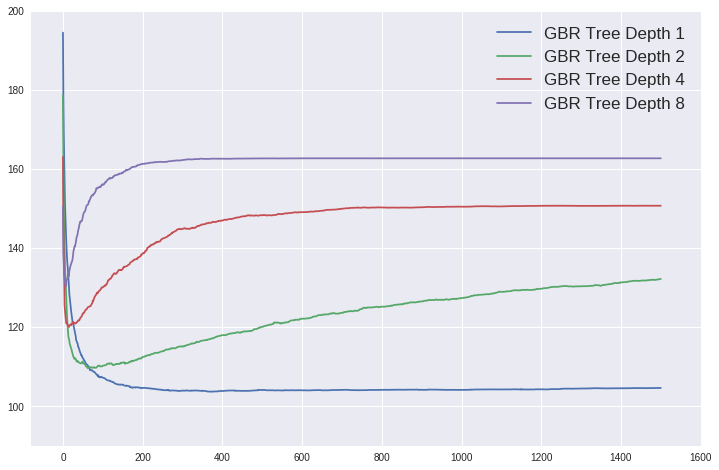

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.plot(np.arange(M+1), gbr_err_depth1, label="GBR Tree Depth 1")
ax.plot(np.arange(M+1), gbr_err_depth2, label="GBR Tree Depth 2")
ax.plot(np.arange(M+1), gbr_err_depth4, label="GBR Tree Depth 4")
ax.plot(np.arange(M+1), gbr_err_depth8, label="GBR Tree Depth 8")

ax.legend(loc="best", fontsize=17)
ax.set_ylim([90,200])
ax.set_xlim([-80,1600])

## multiple learning rate & subsampling

In [24]:
M = 1500
# learning_rate = 1.0

In [25]:
gbr_1 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=1.0,
                  loss="square", subsample=None)
gbr_1.fit(X_train, y_train)

gbr_2 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=0.5,
                  loss="square", subsample=None)
gbr_2.fit(X_train, y_train)

gbr_3 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=1.0,
                  loss="square", subsample=0.8)
gbr_3.fit(X_train, y_train)

gbr_4 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=0.5,
                  loss="square", subsample=0.8)
gbr_4.fit(X_train, y_train)

gbr_5 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=1.0,
                  loss="square", subsample=0.5)
gbr_5.fit(X_train, y_train)

gbr_6 = GBRegression(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), learning_rate=0.5,
                  loss="square", subsample=0.5)
gbr_6.fit(X_train, y_train)

In [26]:
gbr_err_1 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_1.stage_predict(X_test)):
    gbr_err_1[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_2 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_2.stage_predict(X_test)):
    gbr_err_2[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_3 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_3.stage_predict(X_test)):
    gbr_err_3[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_4 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_4.stage_predict(X_test)):
    gbr_err_4[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_5 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_5.stage_predict(X_test)):
    gbr_err_5[i] = np.sqrt(mean_squared_error(y_pred, y_test))
    
gbr_err_6 = np.zeros((M+1,))
for i, y_pred in enumerate(gbr_6.stage_predict(X_test)):
    gbr_err_6[i] = np.sqrt(mean_squared_error(y_pred, y_test))

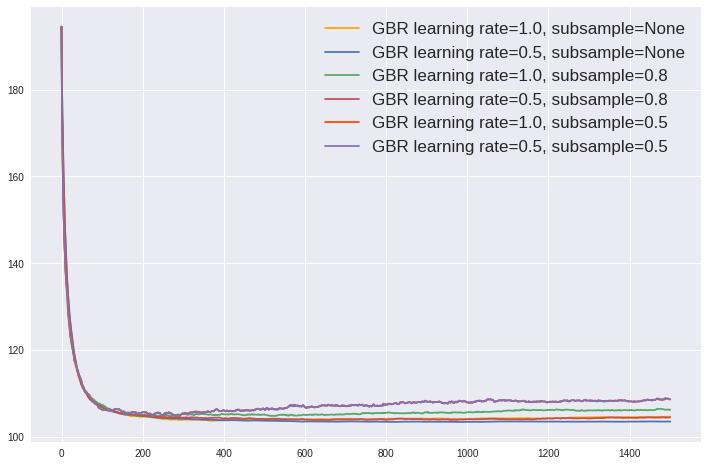

In [31]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

ax.plot(np.arange(M+1), gbr_err_1, label="GBR learning rate=1.0, subsample=None", color="orange")
ax.plot(np.arange(M+1), gbr_err_2, label="GBR learning rate=0.5, subsample=None")
ax.plot(np.arange(M+1), gbr_err_3, label="GBR learning rate=1.0, subsample=0.8")
ax.plot(np.arange(M+1), gbr_err_4, label="GBR learning rate=0.5, subsample=0.8")
ax.plot(np.arange(M+1), gbr_err_5, color="#FF4500", label="GBR learning rate=1.0, subsample=0.5")
ax.plot(np.arange(M+1), gbr_err_5, label="GBR learning rate=0.5, subsample=0.5")

ax.legend(loc="best", fontsize=17)
# ax.set_ylim([0,90])
# ax.set_xlim([-80,1600])

## Classification

In [11]:
from AdaBoost_implementation import AdaBoost

### Normal Data

In [4]:
X,y = datasets.make_hastie_10_2(n_samples=20000, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.columns=["pca_a","pca_b"]
X_pca["y"] = y

Text(9.3,0.5,'axis_2')

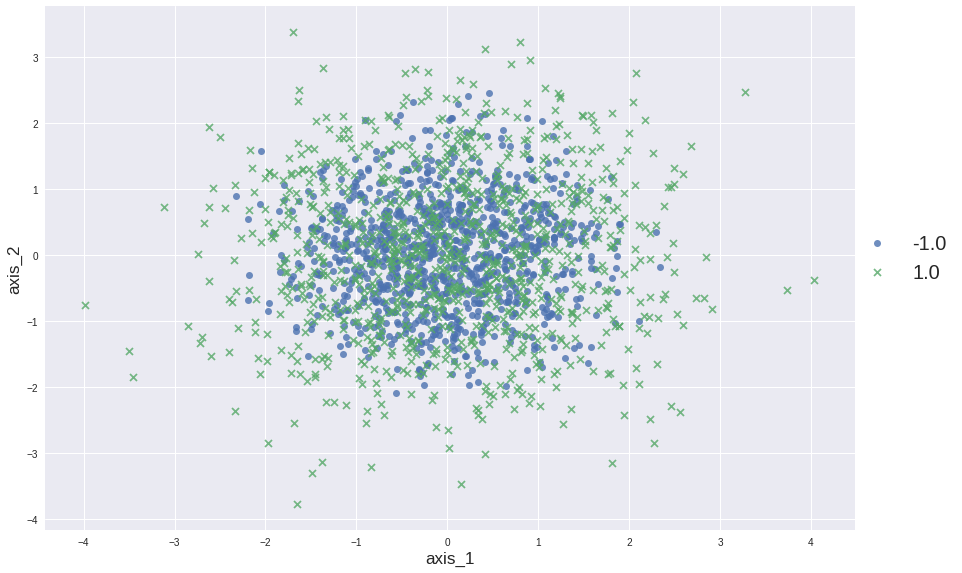

In [6]:
sns.lmplot("pca_a","pca_b",data=X_pca[:2000], hue="y", fit_reg=False, markers=["o","x"],size=8,aspect=1.5,legend=False)
plt.legend(fontsize=20,bbox_to_anchor=(0.98, 0.6),edgecolor ='r')   
plt.xlabel("axis_1",fontsize=17)
plt.ylabel("axis_2",fontsize=17)

In [13]:
M = 1500
learning_rate = 1.0

In [8]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                        method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

training time:  29.50939631462097


In [9]:
ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,
                    method="real",tol=None)
ada_real.fit(X_train, y_train)

training time:  29.66089153289795


In [10]:
ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

In [11]:
gbc = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                       learning_rate=learning_rate, loss="logistic")
gbc.fit(X_train, y_train)

In [12]:
gbc_huber = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                       learning_rate=learning_rate, loss="modified_huber")
gbc_huber.fit(X_train, y_train)

In [13]:
gbc_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc.stage_predict(X_test)):
    gbc_error[i] = zero_one_loss(y_pred, y_test)
    
gbc_huber_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc_huber.stage_predict(X_test)):
    gbc_huber_error[i] = zero_one_loss(y_pred, y_test)

(-80, 1600)

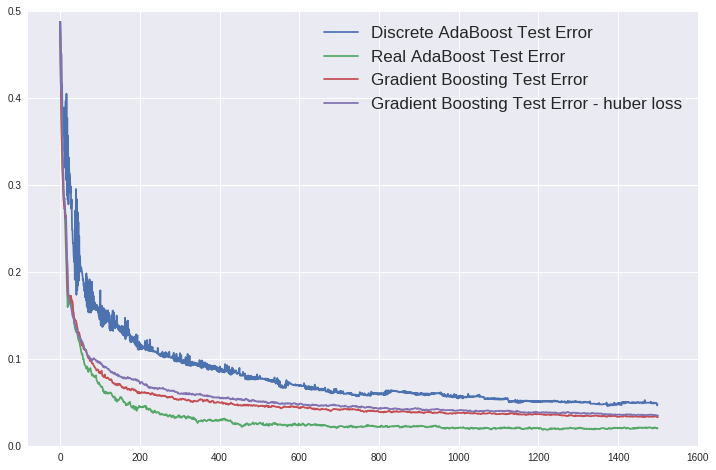

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err ,label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err ,label="Real AdaBoost Test Error")
ax.plot(np.arange(M+1), gbc_error ,label="Gradient Boosting Test Error")
ax.plot(np.arange(M+1), gbc_huber_error ,label="Gradient Boosting Test Error - huber loss")

ax.legend(loc="best", fontsize=17)
ax.set_ylim([0,0.5])
ax.set_xlim([-80,1600])

### Noisy Data

In [60]:
M = 1500
learning_rate = 1.0

In [89]:
X, y = datasets.make_classification(n_samples=20000, n_features=10, n_informative=4, flip_y=0.3, 
                                    n_clusters_per_class=1, n_classes=2, random_state=1)
y[y==0] = -1
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [90]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.columns=["pca_a","pca_b"]
X_pca["y"] = y

Text(9.3,0.5,'axis_2')

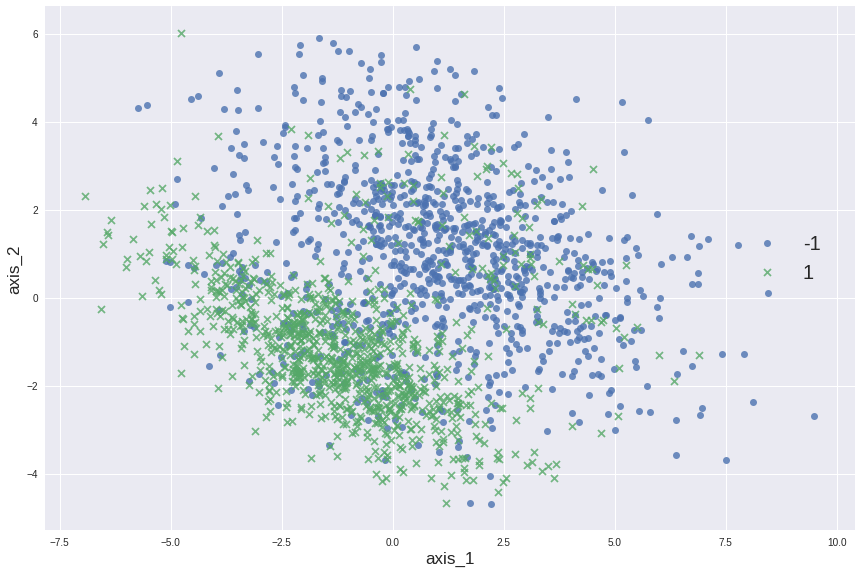

In [91]:
sns.lmplot("pca_a","pca_b",data=X_pca[:2000], hue="y", fit_reg=False, markers=["o","x"],size=8,aspect=1.5,legend=False)
plt.legend(fontsize=20,bbox_to_anchor=(0.98, 0.6),edgecolor ='r')   
plt.xlabel("axis_1",fontsize=17)
plt.ylabel("axis_2",fontsize=17)

In [74]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                        method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

training time:  29.335991621017456


In [75]:
ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,
                    method="real",tol=None)
ada_real.fit(X_train, y_train)

training time:  29.420514345169067


In [76]:
ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

In [77]:
gbc = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                       learning_rate=learning_rate, method="classification", loss="logistic")
gbc.fit(X_train, y_train)

In [78]:
gbc_huber = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                       learning_rate=learning_rate, method="classification", loss="modified_huber")
gbc_huber.fit(X_train, y_train)

In [79]:
gbc_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc.stage_predict(X_test)):
    gbc_error[i] = zero_one_loss(y_pred, y_test)
    
gbc_huber_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc_huber.stage_predict(X_test)):
    gbc_huber_error[i] = zero_one_loss(y_pred, y_test)

(-80, 1600)

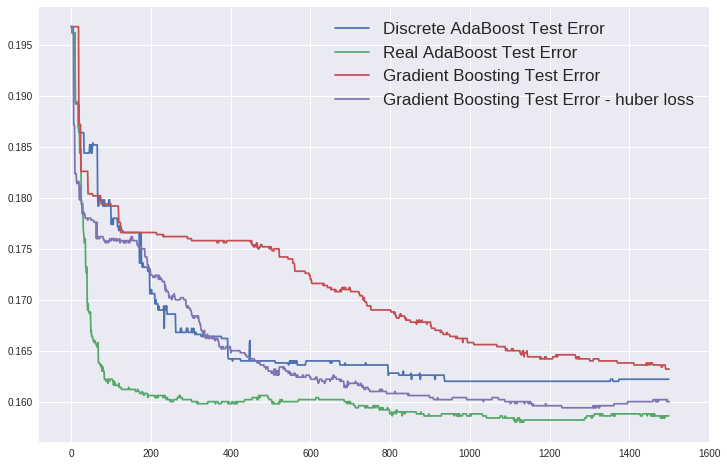

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err ,label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err ,label="Real AdaBoost Test Error")
ax.plot(np.arange(M+1), gbc_error ,label="Gradient Boosting Test Error")
ax.plot(np.arange(M+1), gbc_huber_error ,label="Gradient Boosting Test Error - huber loss")

ax.legend(loc="best", fontsize=17)
# ax.set_ylim([0,0.5])
ax.set_xlim([-80,1600])

### smaller learing rate

In [81]:
M = 3000
learning_rate = 0.1

In [82]:
ada_discrete = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1,random_state=1),learning_rate=learning_rate,
                        method="discrete",tol=None)
ada_discrete.fit(X_train, y_train)

training time:  59.089014768600464


In [83]:
ada_real = AdaBoost(M=M, clf=DecisionTreeClassifier(max_depth=1, random_state=1),learning_rate=learning_rate,
                    method="real",tol=None)
ada_real.fit(X_train, y_train)

training time:  57.96183919906616


In [84]:
ada_discrete_err = np.zeros((M,))
for i, y_pred in enumerate(ada_discrete.stage_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)
    
ada_real_err = np.zeros((M,))
for i, y_pred in enumerate(ada_real.stage_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

In [85]:
gbc = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                       learning_rate=learning_rate, method="classification", loss="logistic",
                      tol=None, subsample=None)
gbc.fit(X_train, y_train)

In [86]:
gbc_huber = GBClassification(M=M, base_learner=DecisionTreeRegressor(max_depth=1, random_state=1), 
                           learning_rate=learning_rate, method="classification", loss="modified_huber",
                            tol=None, subsample=None)
gbc_huber.fit(X_train, y_train)

In [87]:
gbc_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc.stage_predict(X_test)):
    gbc_error[i] = zero_one_loss(y_pred, y_test)
    
gbc_huber_error = np.zeros((M+1,))
for i, y_pred in enumerate(gbc_huber.stage_predict(X_test)):
    gbc_huber_error[i] = zero_one_loss(y_pred, y_test)

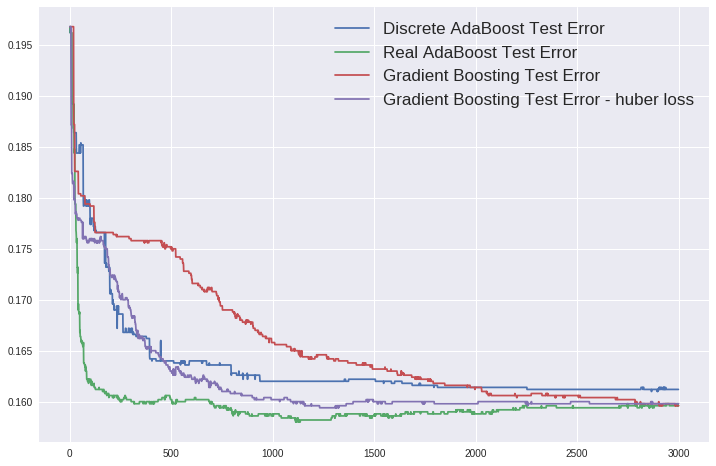

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(np.arange(M), ada_discrete_err ,label="Discrete AdaBoost Test Error")
ax.plot(np.arange(M), ada_real_err ,label="Real AdaBoost Test Error")
ax.plot(np.arange(M+1), gbc_error ,label="Gradient Boosting Test Error")
ax.plot(np.arange(M+1), gbc_huber_error ,label="Gradient Boosting Test Error - huber loss")

ax.legend(loc="best", fontsize=17)
# ax.set_ylim([0,0.5])
# ax.set_xlim([-80,1600])